In [1]:
from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from math import sqrt
def moon(num_points, distance, radius, width):
    '''
    Function to create the double moon
    '''

    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])




In [2]:
#training dataset,testing dataset
# training dataset
def datapoint(points,distance,radius, width):
    x1,x2,y1,y2 = moon(points,distance,radius, width)
    x3 = x1 + x2
    y3 = y1 + y2
    tr1_data = []
    tr2_data = []
    train_data = []
    label = []
    # Since the data have no label, we need to assign for them.
    # We aasign 1 for the first half moon and 0 for the other half
    for i in range(len(x1)):
      a = [x1[i],y1[i], 1]
      tr1_data.append(a)
    for i in range(len(x2)):
      b = [x2[i],y2[i], 0]
      tr2_data.append(b)
    pre_data = np.concatenate((tr1_data,tr2_data))
    np.random.shuffle(pre_data)
    # Extract train_data and label from labeled data
    for i in range(len(pre_data)):
        x = pre_data[i][0]
        y = pre_data[i][1]
        output = pre_data[i][2]
        train_data.append([x, y])
        label.append(output)
    X1 = np.array(train_data)
    Y1 = np.array(label)
    return X1,Y1
def normalize(X,y):
    X_norm = np.ndarray.copy(X)
    y_norm = np.ndarray.copy(y)
    X_mu = np.mean(X_norm,axis=0)
    X_dev = np.std(X_norm, axis = 0)
    X_norm = X_norm - X_mu
    X_dev[X_dev ==0] = 1
    X_norm = X_norm / X_dev
    y_mu = np.mean(y_norm,axis=0)
    y_norm = y_norm - y_mu
    X_norm = np.hstack((np.ones(X_norm.shape[0])[np.newaxis].T,X_norm))
    return X_norm,y_norm

In [3]:
def draw_line(w, xx):
    '''
    Draw decision boundary
    w0 + w1x + w2y = 0 => y = -(w0 + w1x)/w2
    '''
    x = np.linspace(np.amin(xx),np.amax(xx),100)
    y = -(w[0]+x*w[1])/w[2]

    plt.plot(x, y, '--k',label="DB")
    
def predict(x, w):
    sum = w[0]
    for i in range(len(x)):
        sum = sum + w[i+1]*x[i]
    if sum >=0: return 1.0
    else: return 0.0


In [4]:
def fit(X,y,epochs,lr):
    X, y = normalize(X,y)
    w = np.zeros(X[0].shape)
    MSE = []
    square_e = 0
    for _ in range(epochs):
        square_e = 0
        for i,target in zip(X, y):
            yhat = np.dot(i, w)
            errors= target - yhat
            mse = target - predict(i[1:],w)
            w = w + lr* i * errors
            square_e += (mse ** 2)
        MSE.append(square_e/len(X))
        return w, MSE





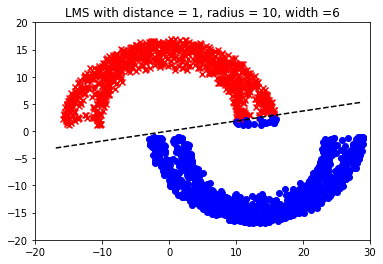

In [5]:
#Task 2
# LMS algorithm with distance = 1
X1_train,y1_train = datapoint(1000,1,10,6)
X1_test,y1_test = datapoint(1000,1,10,6)
w1,MSE1 = fit(X1_train,y1_train,100,0.01)
# Decision boundary
plt.figure(0)
draw_line(w1, X1_train)
for i in range(len(y1_test)):
    if X1_test[i][0]*w1[1] + X1_test[i][1]*w1[2] >= -w1[0] :
        plt.scatter(X1_test[i][0], X1_test[i][1], marker='x', color='r')
    else:
        plt.scatter(X1_test[i][0], X1_test[i][1], marker='o', color='b')

plt.title("LMS with distance = 1, radius = 10, width =6") 
plt.axis([-20, 30, -20, 20])
plt.show()




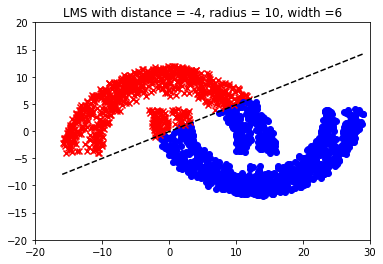

In [6]:
#with distance = -4

X2_train,y2_train = datapoint(1000,-4,10,6)
X2_test,y2_test = datapoint(1000,-4,10,6)
w2,MSE2 = fit(X2_train,y2_train,100,0.01)
# Decision boundary
plt.figure(0)
draw_line(w2, X2_train)
for i in range(len(y2_test)):
    if X2_test[i][0]*w2[1] + X2_test[i][1]*w2[2] >= -w2[0] :
        plt.scatter(X2_test[i][0], X2_test[i][1], marker='x', color='r')
    else:
        plt.scatter(X2_test[i][0], X2_test[i][1], marker='o', color='b')

plt.title("LMS with distance = -4, radius = 10, width =6")        
plt.axis([-20, 30, -20, 20])
plt.show()



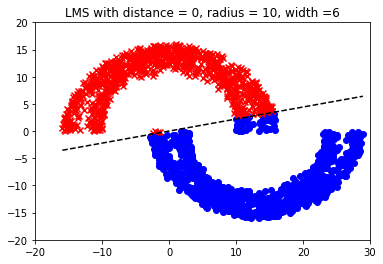

In [7]:
distance = 0
X3_train,y3_train = datapoint(1000,0,10,6)
X3_test,y3_test = datapoint(1000,0,10,6)
w3,MSE3 = fit(X3_train,y3_train,100,0.01)
# Decision boundary
plt.figure(0)
draw_line(w3, X3_train)
for i in range(len(y3_test)):
    if X3_test[i][0]*w3[1] + X3_test[i][1]*w3[2] >= -w3[0] :
        plt.scatter(X3_test[i][0], X3_test[i][1], marker='x', color='r')
    else:
        plt.scatter(X3_test[i][0], X3_test[i][1], marker='o', color='b')

plt.title("LMS with distance = 0, radius = 10, width =6") 
plt.axis([-20, 30, -20, 20])
plt.show()
  


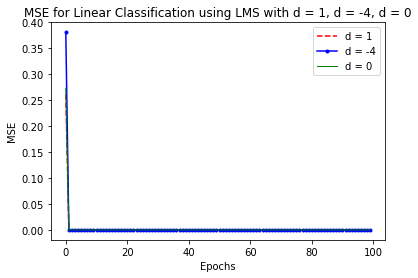

In [12]:
iters = [i for i in range(100)]
for i in range(100-len(MSE1)):
    MSE1.append(0)
for i in range(100-len(MSE2)):
    MSE2.append(0)
for i in range(100-len(MSE3)):
    MSE3.append(0)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("MSE for Linear Classification using LMS with d = 1, d = -4, d = 0")
plt.plot(iters,MSE1,color="red",linestyle='dashed',label = "d = 1")
plt.plot(iters,MSE2,color="blue", marker = '.',label = "d = -4")
plt.plot(iters,MSE3,color="green",linewidth = 1,label = "d = 0")
plt.legend()